## Abstract:

In this notebook, we will be examining the results from a clinical experiment in which 250 mice subjected to lots of drugs. We periodically poked them to see how they were doing. Our objective is to analyze the data to show how 3 treatments Capomulin, Infubinol, and Ketapril compare. We will also be using a placebo baseline. 

The results of this study conclusively prove that Capomulin is the most efficacious at delaying metastsic sites and reducing tumor volume. We consistently see promising results during course of the experiments across all subjects in which the tumor volume and metastic sites all show major improvements. 

Can we leave now? We've been locked down in this lab for 2 months because Steve lost the key...

Oh, also - Steve left the bunsen burner on for 3 days straight by accident. We looked at the packaging and we finally deciphered the strange hieroglyphics on the drug packaging. In our professional opinion, we think it's a warning from the future. Someone call an ambulance and a locksmith and Taco Bell in that order

## Procedure:

The following Jupyter cells show in detail how we stictched the available data together.

To any peer reviewers looking at this, there's an envelope with $100 in your closet. It's yours once this gets to Nature. Don't tell the dean. 

In [1]:
## Import those dependencies. Never leave home without it. 

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Hide warning messages in the notebook because we don't play like that

import warnings
warnings.filterwarnings('ignore')

## It's time to load the datasets! Oh boy, I'm so excited

m_df = pd.read_csv('mouse_drug_data.csv')
c_df = pd.read_csv('clinicaltrial_data.csv')

In [2]:
## Merge datasets
merge_df = m_df.merge(c_df, on='Mouse ID', how='outer')

## Removing this specific ID - it is duplicated with 2 medications
merge_df = merge_df[merge_df['Mouse ID']!='g989']

In [3]:
## Filter only the drugs we want

drugs = ['Capomulin','Infubinol','Ketapril','Placebo']
merge_df = merge_df[merge_df['Drug'].isin(drugs)]

In [4]:
merge_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0


## Tumor Response to Treatment

OBSERVATION NUMBER 1:

In this section, we stitch together the data and determine which drug responds the best to reducing tumor count. Clearly, we see a massive improvement across the board with Capomulin. 

In order to determine this, we first group our dataframes by drug and timepoint and assess the mean across the timepoints. What we see with Capomulin is a 10mm3 reduction in tumor volume; starting at Day 0, our average is 45.00 mm3 and by day 45, we are close to 38 mm3. 

We here at Pymaceuticals have never seen anything like this, and we need to alert the president right away!

Our biggest disappointment came with the makers of Ketapril. What are they thinking? How could they be worse than literally doing nothing vis a vis the placebo? Shameful.

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

mean = merge_df.groupby(['Drug','Timepoint']).mean()

In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

sems = merge_df.groupby(['Drug','Timepoint']).sem()

In [7]:
## Pivot table for mean values - Tumor Volume

pivot = pd.pivot_table(mean, index = 'Timepoint', columns = ['Drug'], values ='Tumor Volume (mm3)')

In [8]:
## Pivot table for sem values - Tumor Volume

pivot_sem = pd.pivot_table(sems, index = 'Timepoint', columns = ['Drug'], values ='Tumor Volume (mm3)')

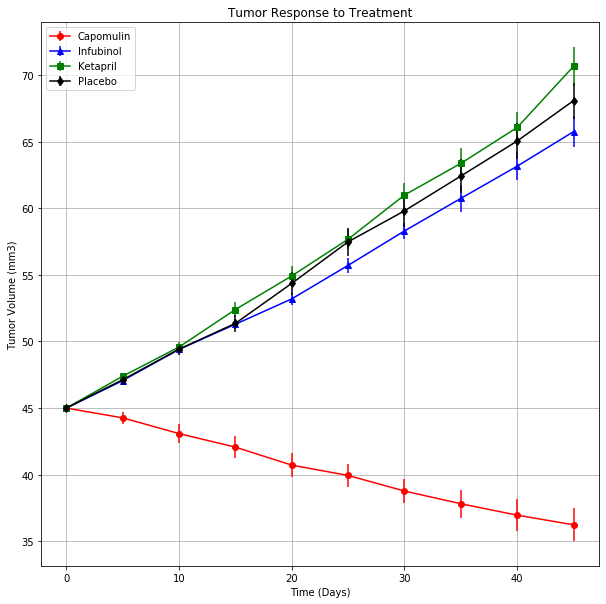

In [9]:
drugs = ['Capomulin','Infubinol','Ketapril','Placebo']

plt.figure(figsize = (10,10))
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.errorbar(pivot.index, pivot['Capomulin'], yerr=pivot_sem['Capomulin'], label='Capomulin', color='r', marker='o')
plt.errorbar(pivot.index, pivot['Infubinol'], yerr=pivot_sem['Infubinol'], label='Infubinol', color='b', marker='^')
plt.errorbar(pivot.index, pivot['Ketapril'], yerr=pivot_sem['Ketapril'], label='Ketapril', color='g', marker='s')
plt.errorbar(pivot.index, pivot['Placebo'], yerr=pivot_sem['Placebo'], label='Placebo', color='black', marker='d')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Metastatic Response to Treatment

OBSERVATION NUMBER 2:

The metastatic response has the best efficacy with Capomulin. The other drugs tend to trend upwards in comparison. The standard errors are high in this dataset, which indicates that the sample size may be small. To conclusively show progress, we would need a larger sample size in order to have higher accuracy. 

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
pivot_met = pd.pivot_table(mean, index = 'Timepoint', columns = ['Drug'], values ='Metastatic Sites')

In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
pivot_sem_met = pd.pivot_table(sems, index = 'Timepoint', columns = ['Drug'], values ='Metastatic Sites')

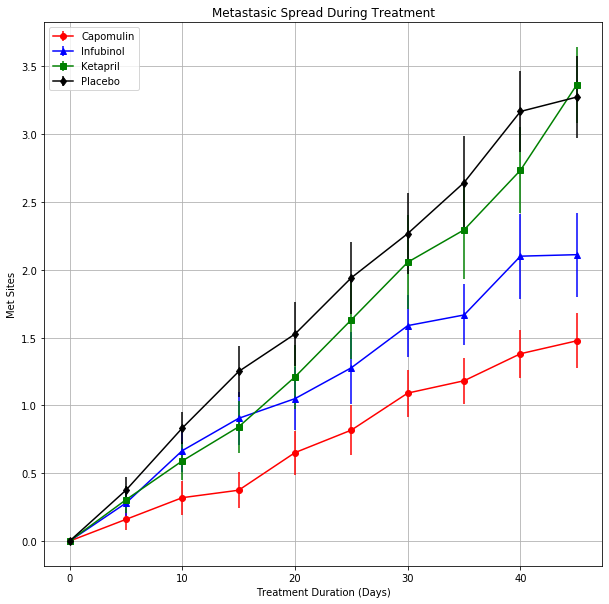

In [12]:
drugs = ['Capomulin','Infubinol','Ketapril','Placebo']

plt.figure(figsize = (10,10))
plt.title('Metastasic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met Sites')
plt.errorbar(pivot.index, pivot_met['Capomulin'], yerr=pivot_sem_met['Capomulin'], label='Capomulin', color='r', marker='o')
plt.errorbar(pivot.index, pivot_met['Infubinol'], yerr=pivot_sem_met['Infubinol'], label='Infubinol', color='b', marker='^')
plt.errorbar(pivot.index, pivot_met['Ketapril'], yerr=pivot_sem_met['Ketapril'], label='Ketapril', color='g', marker='s')
plt.errorbar(pivot.index, pivot_met['Placebo'], yerr=pivot_sem_met['Placebo'], label='Placebo', color='black', marker='d')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Survival Rates

OBSERVATION NUMBER 3:

Finally, we see how Capomulin presents the highest survival rate after 45 days. The other drugs tend to fall sharply in survival rate, with Infubinol presenting a survival rate of just over 35%. 

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count = merge_df.groupby(['Drug','Timepoint']).count()
count.head()

Mouse ID  Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                                
Capomulin 0                25                  25                25
          5                25                  25                25
          10               25                  25                25
          15               24                  24                24
          20               23                  23                23

In [14]:
## Reformatting

pivot_count = pd.pivot_table(count, index = 'Timepoint', columns = ['Drug'], values = 'Mouse ID')

In [15]:
## Create percent columns 

pivot_count['Cap Percent'] = (pivot_count['Capomulin']/25*100)
pivot_count['Inf Percent'] = (pivot_count['Infubinol']/25*100)
pivot_count['Ket Percent'] = (pivot_count['Ketapril']/25*100)
pivot_count['Plc Percent'] = (pivot_count['Placebo']/25*100)

In [16]:
## New dataframe that only has the filtered percents 

pivot_percent = pivot_count[['Cap Percent','Inf Percent','Ket Percent','Plc Percent']]

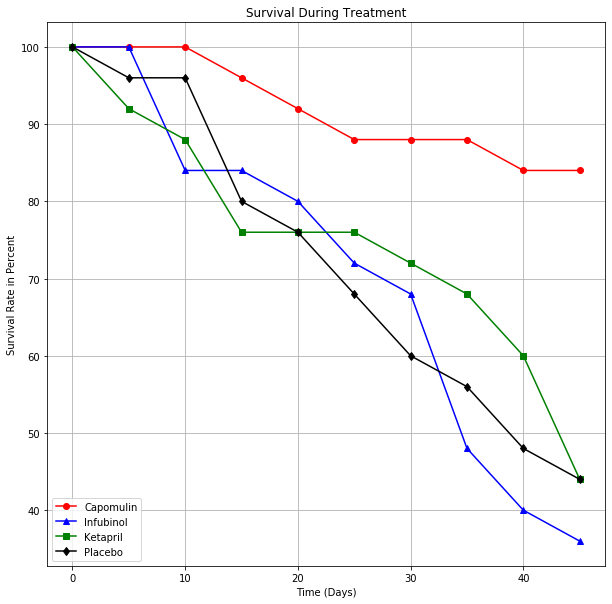

In [17]:
# Generate the Plot 
plt.figure(figsize = (10,10))
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate in Percent')
plt.plot(pivot_percent['Cap Percent'], label='Capomulin', color='r', marker='o')
plt.plot(pivot_percent['Inf Percent'], label='Infubinol', color='b', marker='^')
plt.plot(pivot_percent['Ket Percent'], label='Ketapril', color='g', marker='s')
plt.plot(pivot_percent['Plc Percent'], label='Placebo', color='black', marker='d')
plt.legend(loc='lower left')
plt.grid()
plt.show()

## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug

drugs = ['Capomulin','Infubinol','Ketapril','Placebo']

change_array = []

for j in range(len(drugs)):
    x = drugs[j]
    per_df = pivot[x]
    first_value = per_df.iloc[0]
    last_value = per_df.iloc[-1]
    percent_change = round(((last_value-first_value)/first_value*100),2) 
    change_array.append(percent_change)

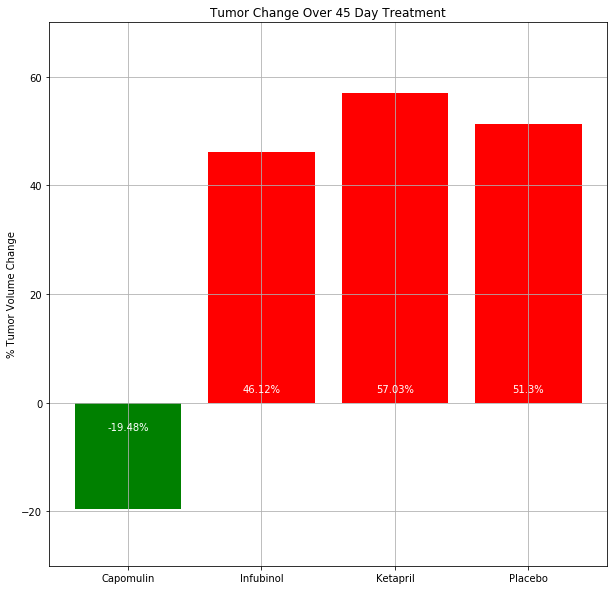

In [19]:
##Set bar graphs values: 

plt.figure(figsize = (10,10))
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel('% Tumor Volume Change')
plt.bar(drugs,change_array,color='grrr')
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(True)
plt.ylim(-30,70)
## Enumerate function to pass the right coordinates into the text function

for i,v in enumerate(change_array):
    if v < 0:
        y_plc = -5
    else:
        y_plc = 2
    plt.text(i, y_plc, s=str(v)+'%', ha = 'center', color = 'white')

plt.show()

## Conclusion

If I were a mouse with cancer, I'd definitely want to take Capomulin.